# 0.) Import and Clean data

In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
#drive.mount('/content/gdrive/', force_remount = True)

In [4]:
df = pd.read_csv("bank-additional-full (1).csv",delimiter = ";")

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [7]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [8]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

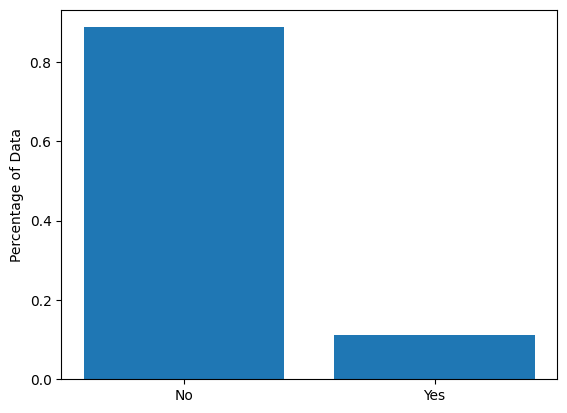

In [9]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [10]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [11]:
###############
###TRANSFORM###
###############

X_scaled 


array([[-1.05370899e+00, -6.95116435e-01, -1.59354604e-01, ...,
        -3.80604293e-01,  1.54270966e+00, -2.11638189e-01],
       [-1.05370899e+00, -9.44916212e-01, -1.59354604e-01, ...,
        -3.80604293e-01,  1.54270966e+00, -2.11638189e-01],
       [ 4.77399239e-01,  7.34982641e-02, -1.59354604e-01, ...,
        -3.80604293e-01, -6.48210109e-01, -2.11638189e-01],
       ...,
       [-4.79543407e-01, -2.45476836e-01, -1.59354604e-01, ...,
        -3.80604293e-01, -6.48210109e-01, -2.11638189e-01],
       [-1.07208378e-03,  1.42673587e-01, -1.59354604e-01, ...,
        -3.80604293e-01,  1.54270966e+00, -2.11638189e-01],
       [-1.05370899e+00,  2.88710380e-01, -1.59354604e-01, ...,
        -3.80604293e-01,  1.54270966e+00, -2.11638189e-01]])

In [12]:
y_train 

,yes
39075,False
34855,False
7107,False
31614,False
34878,False
...,...
6265,False
11284,False
38158,True
860,False


In [13]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [14]:
smote = SMOTE()
X_scaled, y_train  = smote.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [15]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= -0.165\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= -0.499\ngini = 0.292\nsamples = 19907\nvalue = [16367, 3540]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 4.161\ngini = 0.109\nsamples = 10377\nvalue = [9777, 600]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.093\nsamples = 10185\nvalue = [9688, 497]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.497\nsamples = 192\nvalue = [89, 103]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 1.317\ngini = 0.427\nsamples = 9530\nvalue = [6590, 2940]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.485\nsamples = 6904\nvalue = [4054, 2850]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.066\nsamples = 2626\nvalue = [2536, 90]\nclass = No'),
 Text(0.75, 0.625, 'contact_telephone <= 1.322\ngini = 0.416\nsamples = 31253\nvalue = [9213, 22040]\nclass = Yes'),
 Text(0.625, 0.375, 'duration <= 0.762\ngini = 0.336\nsamples = 25727\nvalue = [5490, 20237]\nclass 

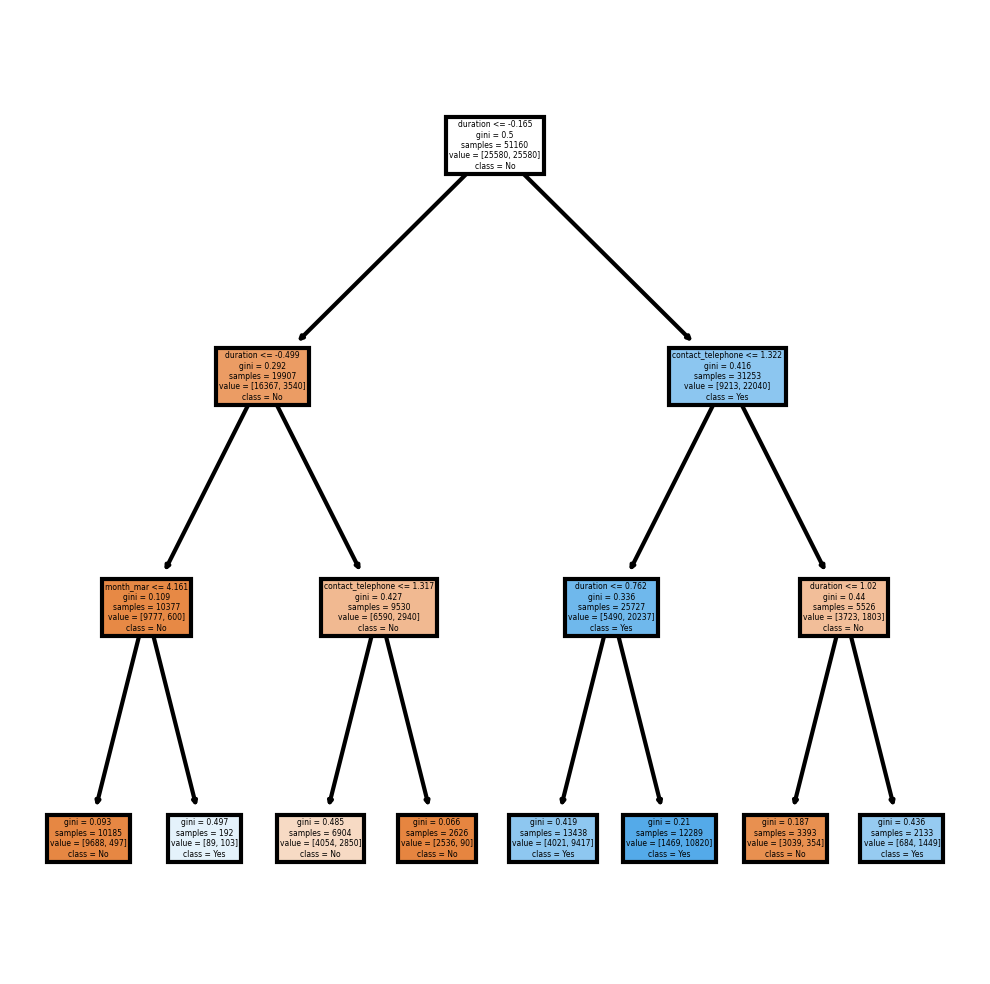

In [16]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(dtree, filled = True, feature_names=X.columns.tolist(), class_names=["No","Yes"])


#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

In [17]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

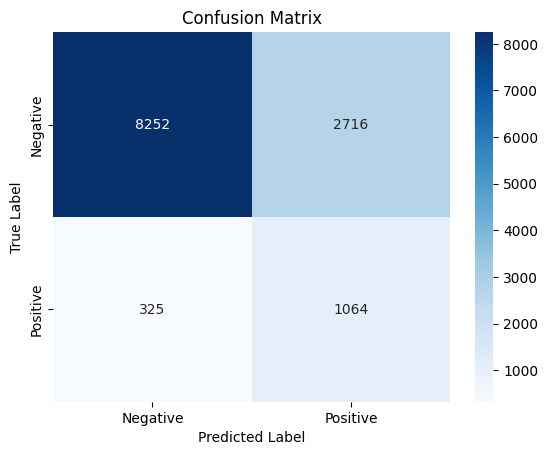

In [18]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

In [19]:
dtree = DecisionTreeClassifier(max_depth=3)

In [20]:
bagging = BaggingClassifier(estimator = dtree, 
                  n_estimators = 100,
                 max_samples  = .5,
                max_features = 1.)
bagging.fit(X_scaled, y_train)
y_pred = bagging.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


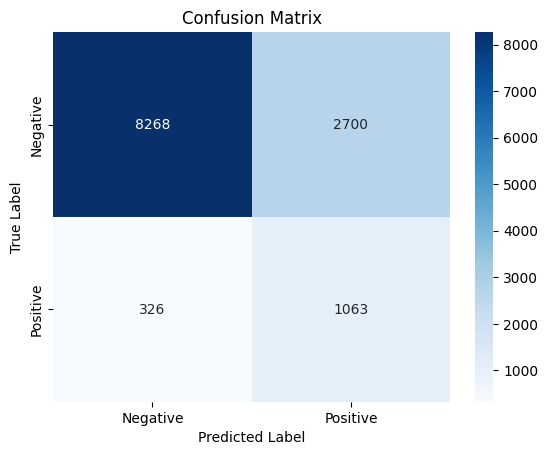

In [21]:
cm_raw = confusion_matrix(y_true, y_pred)
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [22]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_scaled,y_train)

DecisionTreeClassifier(max_depth=3)

In [24]:
boost = AdaBoostClassifier(estimator = dtree, 
                  n_estimators = 100
            )
boost.fit(X_scaled, y_train)
y_pred = boost.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


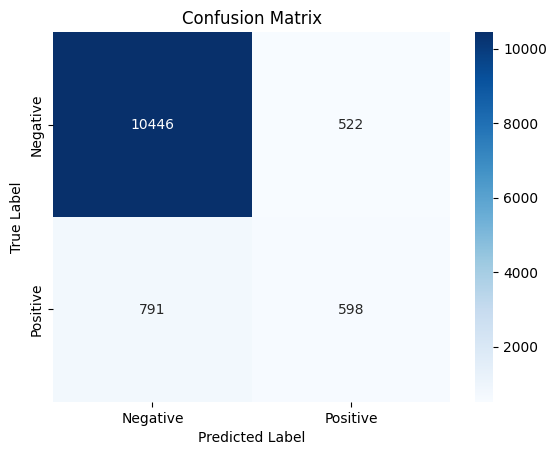

In [25]:
cm_raw = confusion_matrix(y_true, y_pred)
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 4 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [26]:
#pip install mlens

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from mlens.ensemble import SuperLearner

[MLENS] backend: threading


In [28]:
X_base_learners = np.array([
    list(bagging.predict(X_scaled)),
    list(boost.predict(X_scaled)),
    list(dtree.predict(X_scaled))
]).T

In [29]:
X_base_learners

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ...,
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [30]:
y_train

,yes
0,False
1,False
2,False
3,False
4,False
...,...
51155,True
51156,True
51157,True
51158,True


In [31]:
super_learner = LogisticRegression()

In [32]:
#y_train_expanded = np.concatenate([y_train, y_train, y_train])
super_learner.fit(X_base_learners,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [33]:
super_learner.coef_

array([[0.71229148, 5.28302241, 0.81943935]])

In [34]:
X_test_n = np.array([
    list(bagging.predict(X_test)),
    list(boost.predict(X_test)),
    list(dtree.predict(X_test))
]).T
y_pred = super_learner.predict(X_test_n)

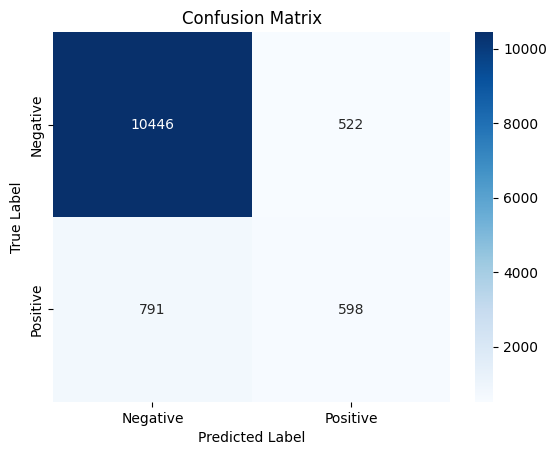

In [35]:
cm_raw = confusion_matrix(y_true, y_pred)
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Boost is the best model.

# 6.)